# Cindy Lo's Web Scraping Project: Realtor.ca 


# Table of Content

# Contents
- [Getting started: Installation ](#1.-Getting-started:-Installation)
- [Open Realtor.ca Through Webdriver](#2.-Open-Web-Through-Webdriver-to-Search-On-Realtor.ca)
- [Scraping Data Using Beautiful Soup /Selenium](#3-Scraping-Data-Using-Beautiful-Soup-/Selenium)
- [Clean / Manipulate data using Pandas](#4-Clean-/-Manipulate-data-using-Pandas)
- [Data Visualizations using Matplotlib / Seaborn / Plotly](#5-Analysis-/-Visualizations-using-Matplotlib-/-Seaborn-/-Plotly)

# 1. Getting started: Installation 


### Install selenium python package 

In [1]:
#!pip install selenium

### Import Python Libraries 

In [2]:
import pandas as pd
from time import sleep 
import numpy as np #calculation tool on data set
import matplotlib.pyplot as plt #data visualization tool
%matplotlib inline 
import matplotlib.colors as mcolors
import seaborn as sns
import re
import random
from selenium.webdriver.common.by import By

### Import Webdriver Beautiful Soup

In [13]:
from selenium import webdriver

from selenium.webdriver.common.keys import Keys

from bs4 import BeautifulSoup

In [14]:
#selenium is to navigate code easier but if i keep using selenium multiple times i may be blocked as a hacker

# 2. Open Web Through Webdriver to Search On Realtor.ca

In [15]:
# Open a webdriver to direct to the webs
driver = webdriver.Chrome('E:\chromedriver-win64\chromedriver-win64\chromedriver.exe')

## Go to Realtor.ca in the get method
#driver.get(webpage) - pass in the webpage you want to visit
driver.get("https://www.realtor.ca")

AttributeError: 'str' object has no attribute 'capabilities'

In [ ]:
# Manually pass verifying identification through puzzle 

In [ ]:
##This is to click the find a home on realtor.ca
driver.find_element(By.XPATH,'//*[@id="headerMenu"]/div[1]/a').click()

#sleep for 3 minutes
sleep(3)


# Finding search bar on Realtor.ca
search_bar = driver.find_element(By.XPATH,'/html/body/form/div[5]/div[2]/span/div/div[1]/div/div[1]/div[1]/div[1]/div[2]/input[2]')

# Send elements into the search bar - Search for Toronto
search_bar.send_keys("Toronto")

# Press Enter/Return after typing Toronto on search
search_bar.send_keys(Keys.RETURN)

# 3 Scraping Data Using Beautiful Soup /Selenium

In [ ]:
# self-note: beautiful soup is to read, organize and paste the code to a variable name as a soup in jupyter

### Raw data using page source from Realtor.ca

In [ ]:
#HTML code in Realtor.ca
#Read HTML code in Selenium (non-organized way) on Toronto search in Realtor.ca 
page_source=driver.page_source

#Send the HTML code to be displayed
page_source

In [ ]:
from selenium.webdriver.common.by import By
driver.find_element(By.TAG_NAME, 'a')

### Raw data using BeautifulSoup from Realtor.ca

In [ ]:
#Read HTML code in Beautifulsoup (organized way) on Toronto search in Realtor.ca 

In [ ]:
rawsoup= BeautifulSoup(page_source)

In [ ]:
rawsoup

In [ ]:
# The <div> tag defines a division or a section in an HTML document
#grab only the first element which is 'Find a Home' on top left tab in beautifulsoup
rawsoup.find('div', class_='headerMenuItem') #Div may change over time


In [ ]:
#grab all elements on top left tab in beautifulsoup
rawsoup.find_all('div', class_='headerMenuItem') #Div may change over time


In [ ]:
#select for sale
rawsoup.find_all('span', {'class':'select2-selection__rendered'})[0].get_text().strip()

In [ ]:
#select listings'address
rawsoup.find_all('div', {'class':'smallListingCardAddress'})

In [ ]:
#select all to find listing price
rawsoup.find_all('div', {'class':'smallListingCardPrice'})

In [ ]:
#select all to find first listing price
rawsoup.find_all('div', {'class':'smallListingCardPrice'})[0].get_text().strip()

# 4 Clean / Manipulate data using Pandas

In [18]:
#Creating new columns
price =[]
address= []
bedroom=[]
room=[]
bathroom=[]
#Try to use for loops to use selenium list and beautiful to extract all info to collect on that page 
## big  loop gonna be for looping over pages
page=1
for page in range(1,100): #page is gonna be range from pg.1 to pg.100 to collect over 1000 data rows
        
    ##adding sleep to delay in scraping to avoid server overload
    sleep(2)
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    print("page no.",page)

    #### open the page source through driver
    page_source = driver.page_source
    page_source

    #### You can also use BeautifulSoup to parse the html. Note: parse means to describe html
    soup = BeautifulSoup(page_source)

    ## use beautiful soup in inner loop to loop over all houses in that page
    for house in soup.find_all('div',class_='cardCon'):
        price.append(house.find('div',class_='smallListingCardPrice').get_text())
        try:
            address.append(house.find('div', class_= 'smallListingCardAddress').get_text())
        except:
            address.appen("No Address")
        rooms = house.find_all('div',class_='smallListingCardIconNum')
       
        if(len(rooms)==2):
            print('inside')
            try:
                bedroom.append(rooms[0].get_text().split('+')[0].strip())
                
            except:
                bedroom.append(0)
                
                
            try:
                room.append(rooms[0].get_text().split('+')[1].strip())
            except:
                room.append(0)
                

            try:
                bathroom.append(rooms[1].get_text())
            except:
                bathroom.append(0)
                
                
        if(len(rooms)==1):
            bathroom.append(rooms[0].get_text())
            bedroom.append(0)
            room.append(0)
            
        if(len(rooms)== 0):
            bathroom.append(0)
            bedroom.append(0)
            room.append(0)
                  
    driver.find_element(By.XPATH,'/html/body/form/div[5]/div[2]/span/div/div[3]/div/div[1]/div[2]/div[4]/span/div/a[3]/div').click()


NameError: name 'driver' is not defined

In [19]:
#check the length of listing
len(price)

0

In [ ]:
#check the length of listing
len(address)

In [ ]:
#check the length of listing
len(bedroom)

In [ ]:
#Complete checking and it's good

## Table of Cleaned Data Using Pandas

In [17]:
houses = pd.DataFrame()

houses['price'] =price
houses['address'] = address
houses['bedroom'] = bedroom
houses['den'] = room
houses['bathroom'] =bathroom
houses

NameError: name 'price' is not defined

### Convert dataframe into csv.file 

In [16]:
#Convert dataframes into csv file for data visualization
#name csv file as houses in the quotation mark
#houses.to_csv('file_path', index=False) #saved where the local project is which is in the download folder
houses.to_csv('houses.csv', index=False)


NameError: name 'houses' is not defined

### Reload data from csv.file 

In [3]:
# Load the data from houses.csv into a DataFrame
houses = pd.read_csv('houses.csv')

### Create a new column to extract city out from the table 

In [4]:
#Extract the city out from the address
houses['city'] = houses['address'].apply(lambda x: x.split(',')[-2].strip() if len(x.split(',')) >= 2 else 'Unknown')

In [5]:
houses

,price,address,bedroom,den,bathroom,city
0,"$1,199,999","2977 HEARTWOOD LANE, Pickering, Ontario",4,0,3,Pickering
1,"$799,900","19 WEEKES DR, Ajax, Ontario",3,1,4,Ajax
2,"$445,000","#3411 -251 JARVIS ST, Toronto, Ontario",0,0,1,Toronto
3,"$999,000","#1513 -30 SHORE BREEZE DR, Toronto, Ontario",2,0,1,Toronto
4,"$679,900","#106 -9700 NINTH LINE, Markham, Ontario",2,1,2,Markham
...,...,...,...,...,...,...
1183,"$1,849,000","615 BROWNS LINE S, Toronto, Ontario",3,1,2,Toronto
1184,"$3,179,000","272 PINEHURST DR, Oakville, Ontario",3,2,3,Oakville
1185,"$2,500,000","1340 CONTOUR Drive, Mississauga, Ontario",3,0,3,Mississauga
1186,"$1,688,300","7 BAYNARDS LANE, Richmond Hill, Ontario",4,1,5,Richmond Hill


# 5 Analysis / Visualizations using Matplotlib / Seaborn / Plotly

In [ ]:
# Pie chart: mean house listing's price in % in a city

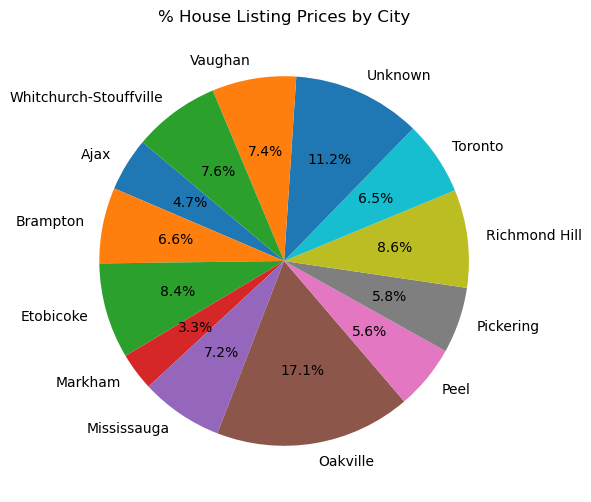

In [6]:
# Extracting the city from the address column
# Adjust the splitting logic to handle potential variations in address format
houses['city'] = houses['address'].apply(lambda x: x.split(',')[-2].strip() if len(x.split(',')) >= 2 else 'Unknown')

# Removing the '$' sign and converting price to numeric
houses['price'] = houses['price'].replace('[\$,]', '', regex=True).astype(float)

# Grouping by city and calculating the % average house price listing in city
average_prices = houses.groupby('city')['price'].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
average_prices.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('% House Listing Prices by City')
plt.ylabel('')
plt.show()

In [7]:
# Remove non-numeric characters ($) and convert to numeric format
houses['price'] = houses['price'].replace('[\$,]', '', regex=True).astype(float)
houses


,price,address,bedroom,den,bathroom,city
0,1199999.0,"2977 HEARTWOOD LANE, Pickering, Ontario",4,0,3,Pickering
1,799900.0,"19 WEEKES DR, Ajax, Ontario",3,1,4,Ajax
2,445000.0,"#3411 -251 JARVIS ST, Toronto, Ontario",0,0,1,Toronto
3,999000.0,"#1513 -30 SHORE BREEZE DR, Toronto, Ontario",2,0,1,Toronto
4,679900.0,"#106 -9700 NINTH LINE, Markham, Ontario",2,1,2,Markham
...,...,...,...,...,...,...
1183,1849000.0,"615 BROWNS LINE S, Toronto, Ontario",3,1,2,Toronto
1184,3179000.0,"272 PINEHURST DR, Oakville, Ontario",3,2,3,Oakville
1185,2500000.0,"1340 CONTOUR Drive, Mississauga, Ontario",3,0,3,Mississauga
1186,1688300.0,"7 BAYNARDS LANE, Richmond Hill, Ontario",4,1,5,Richmond Hill


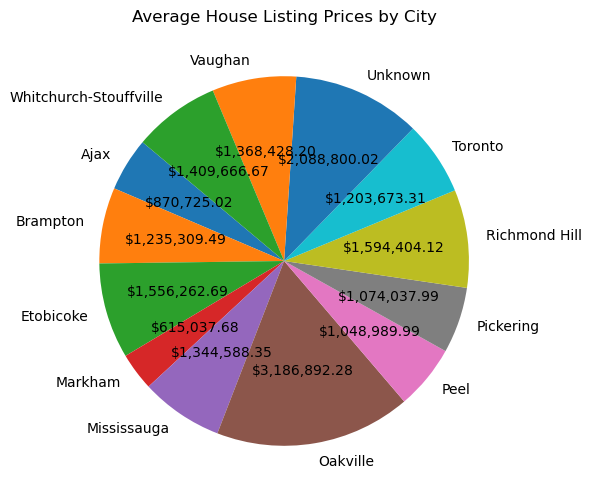

In [40]:
#Pie chart: average house listing's price in a city
# Extracting the city from the address column
houses['city'] = houses['address'].apply(lambda x: x.split(',')[-2].strip() if len(x.split(',')) >= 2 else 'Unknown')

# Removing the '$' sign and converting price to numeric
houses['price'] = houses['price'].replace('[\$,]', '', regex=True).astype(float)

# Grouping by city and calculating the average house price listing in each city
average_prices = houses.groupby('city')['price'].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
# Converting the percentages in autopct to average price numbers
average_prices.plot(kind='pie', autopct=lambda p: '${:,.2f}'.format(p * sum(average_prices) / 100), startangle=140)
plt.title('Average House Listing Prices by City')
plt.ylabel('')
plt.show()

In [41]:
# Set pandas options to display full numbers
pd.options.display.float_format = '{:.0f}'.format

In [42]:
# Now calculate the mean price by city
average_prices_by_city = houses.groupby('city')['price'].mean()

In [11]:
average_prices_by_city 

city
Ajax                      870725
Brampton                 1235310
Etobicoke                1556263
Markham                   615038
Mississauga              1344588
Oakville                 3186892
Peel                     1048990
Pickering                1074038
Richmond Hill            1594404
Toronto                  1203673
Unknown                  2088800
Vaughan                  1368428
Whitchurch-Stouffville   1409667
Name: price, dtype: float64

C:\Users\tests\AppData\Local\Temp\ipykernel_57268\569579593.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


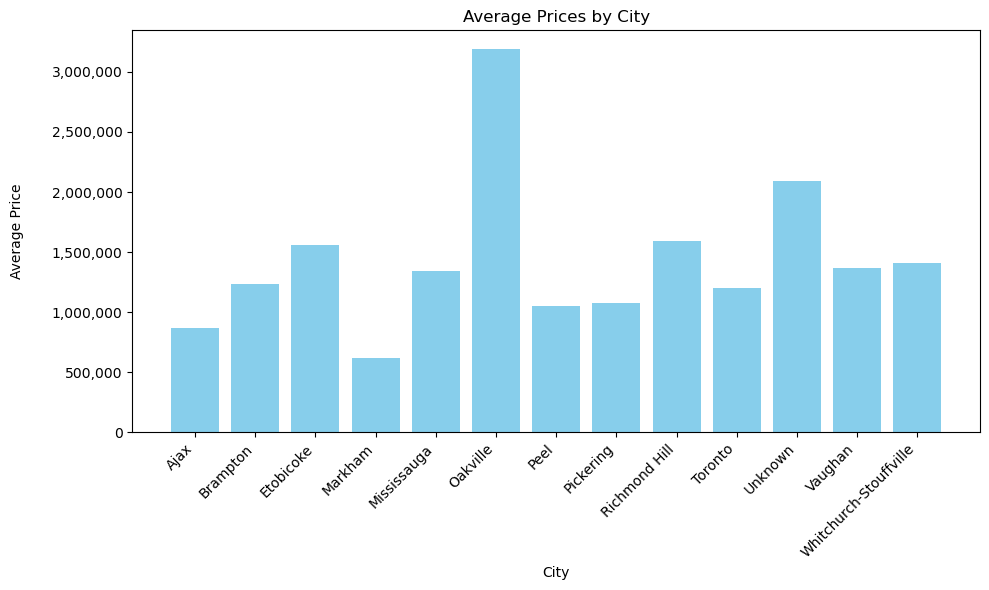

In [43]:
#Bar chart: average house listing's price in a city
# Define the data
cities = average_prices_by_city.index
avg_prices = average_prices_by_city.values

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(cities, avg_prices , color='skyblue')

# Customize the chart
plt.title('Average Prices by City')
plt.xlabel('City')
plt.ylabel('Average Price', labelpad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Format y-axis tick labels to display full numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))
#gets the current axes instance, retrieves y-axis associated with the current axes, sets the major formatter for the y-axis tick labels
#lambda function formats each tick label('x')

plt.tight_layout()

# Show the plot
plt.show()



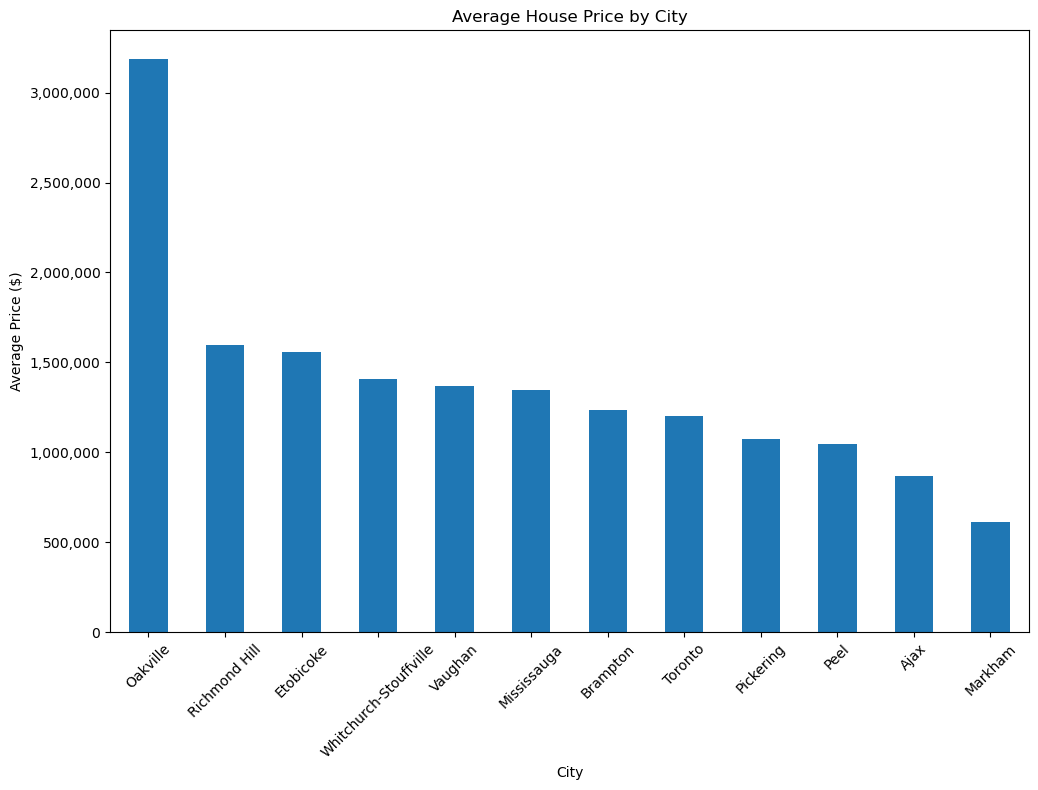

In [27]:
# Cleaning the price column and extracting city from address
houses['price'] = houses['price'].replace('[\$,]', '', regex=True).astype(float)
houses['city'] = houses['address'].str.split(',').str[-2].str.strip()

# Calculate average price per city
avg_price_per_city = houses.groupby('city')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
avg_price_per_city.plot(kind='bar')
plt.title('Average House Price by City')
plt.ylabel('Average Price ($)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
# Format y-axis tick labels to display full numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))
#gets the current axes instance, retrieves y-axis associated with the current axes, sets the major formatter for the y-axis tick labels
#lambda function formats each tick label('x')

plt.show()


<Figure size 1200x800 with 0 Axes>

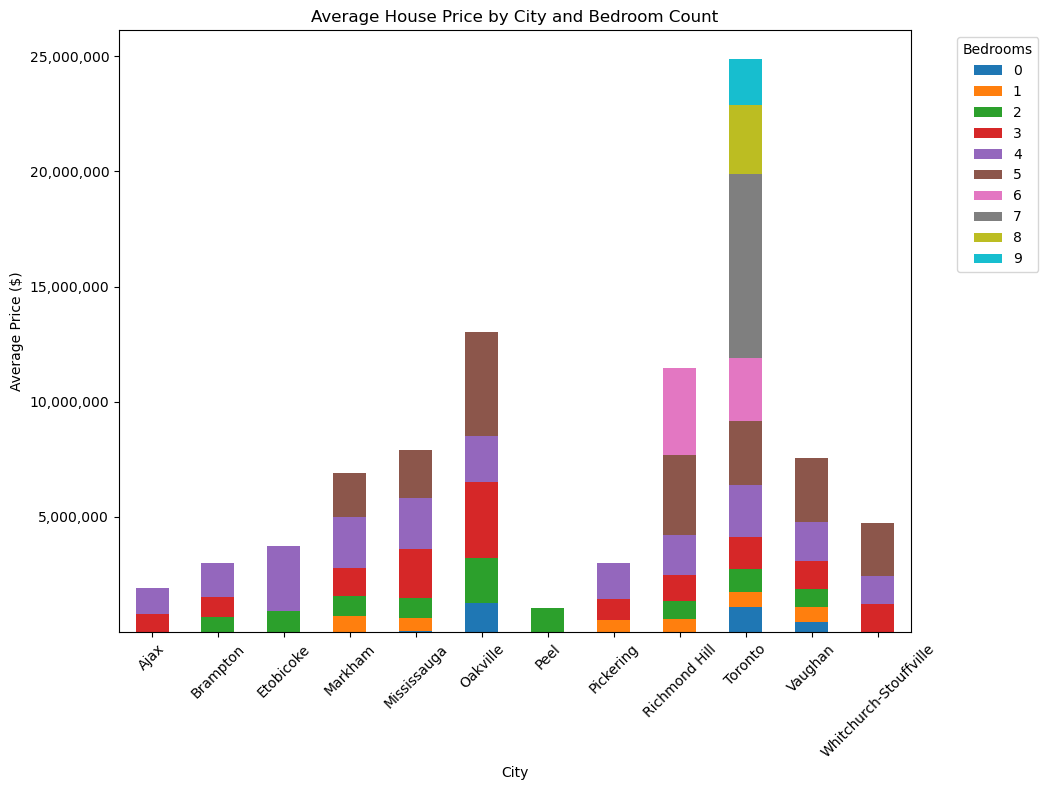

In [33]:
# To create a stacked bar chart based on the number of bedrooms, we'll first prepare the data.

# Calculating average price for each combination of city and number of bedrooms
avg_price_bedroom_city = houses.groupby(['city', 'bedroom'])['price'].mean().unstack(fill_value=0)

# Plotting a stacked bar chart with average price
plt.figure(figsize=(12, 8))
avg_price_bedroom_city.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Average House Price by City and Bedroom Count')
plt.ylabel('Average Price ($)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Bedrooms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Format y-axis tick labels to display full numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

plt.show()



<Figure size 1200x800 with 0 Axes>

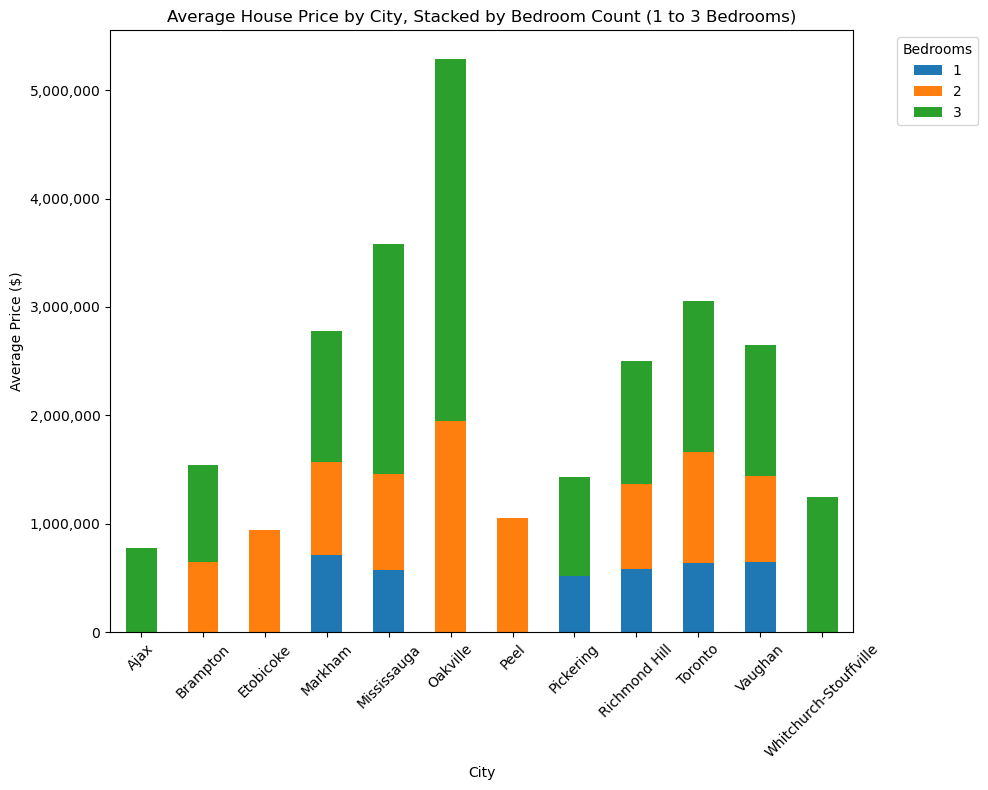

In [39]:
# To focus on houses with 1 to 3 bedrooms, we'll filter the dataset accordingly before calculating the average price per city and bedroom count.

# Filtering the dataset for houses with 1 to 3 bedrooms
filtered_data = houses[houses['bedroom'].between(1, 3)]

# Grouping the filtered data by city and bedroom count, then calculating the average price for each group
avg_price_filtered = filtered_data.groupby(['city', 'bedroom'])['price'].mean().unstack(fill_value=0)

# Plotting the adjusted stacked bar chart for 1 to 3 bedrooms
plt.figure(figsize=(12, 8))
avg_price_filtered.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Average House Price by City, Stacked by Bedroom Count (1 to 3 Bedrooms)')
plt.ylabel('Average Price ($)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Bedrooms', bbox_to_anchor=(1.05, 1), loc='upper left')
# Format y-axis tick labels to display full numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

plt.tight_layout()
plt.show()




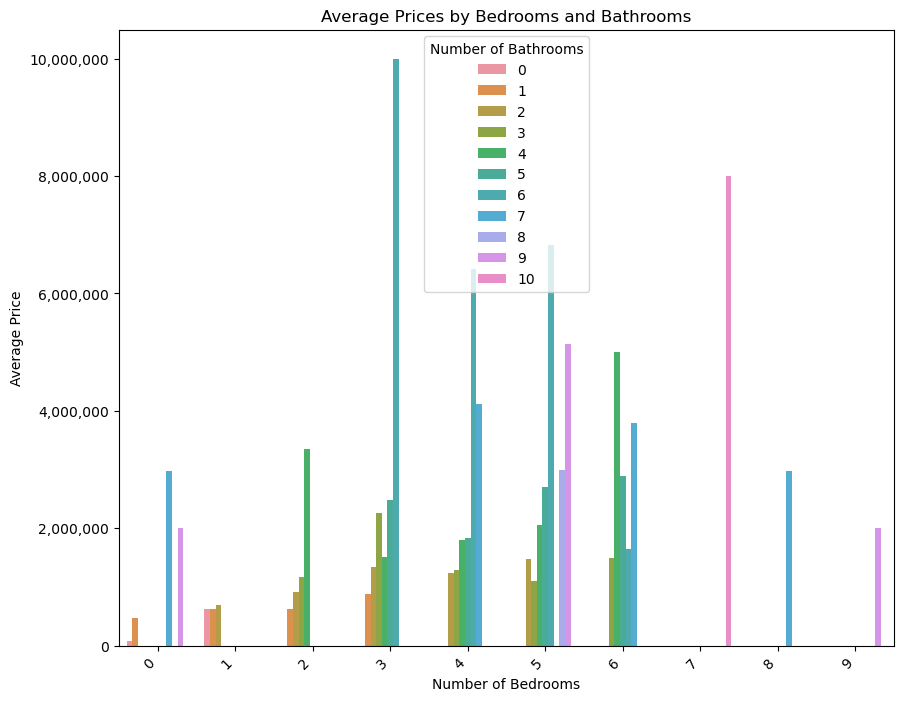

In [13]:
#Grouped bar chart: average price listing by bedrooms and bathrooms
avg_prices = houses.groupby(['bedroom', 'bathroom'])['price'].mean().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='bedroom', y='price', hue='bathroom', data=avg_prices)

# Customize the chart
plt.title('Average Prices by Bedrooms and Bathrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.legend(title='Number of Bathrooms')
plt.xticks(rotation=45, ha='right')

# Format y-axis tick labels to display full numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

# Show the plot
plt.show()


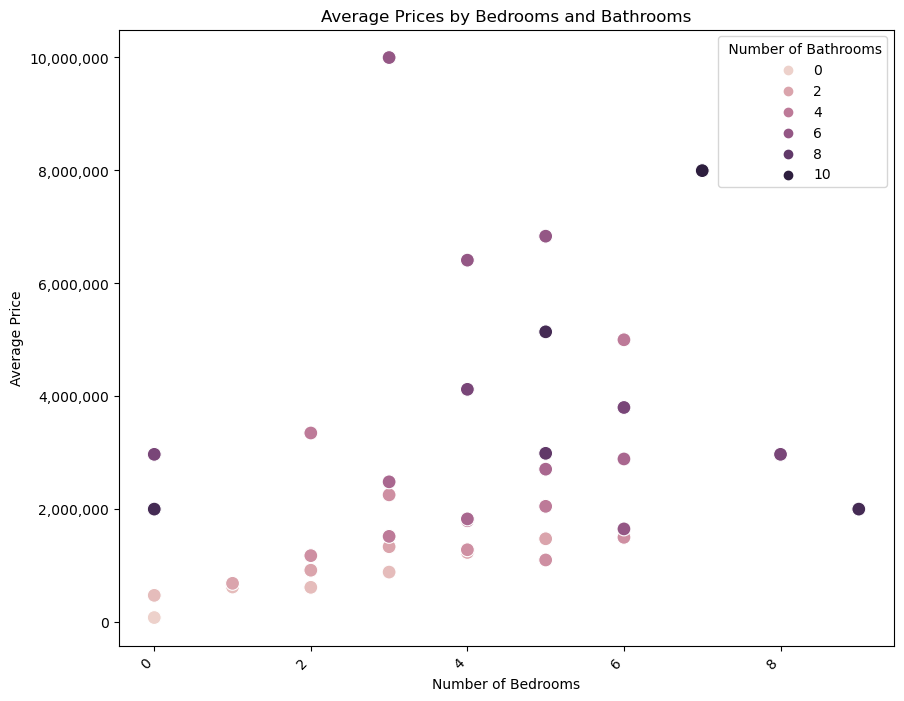

In [22]:
# Grouped scatter plot: average price listing by bedrooms and bathrooms
avg_prices = houses.groupby(['bedroom', 'bathroom'])['price'].mean().reset_index()

# Create a grouped scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='bedroom', y='price', hue='bathroom', data=avg_prices, s=100)

# Customize the chart
plt.title('Average Prices by Bedrooms and Bathrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.legend(title=' Number of Bathrooms')
plt.xticks(rotation=45, ha='right')

# Format y-axis tick labels to display full numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

# Show the plot
plt.show()


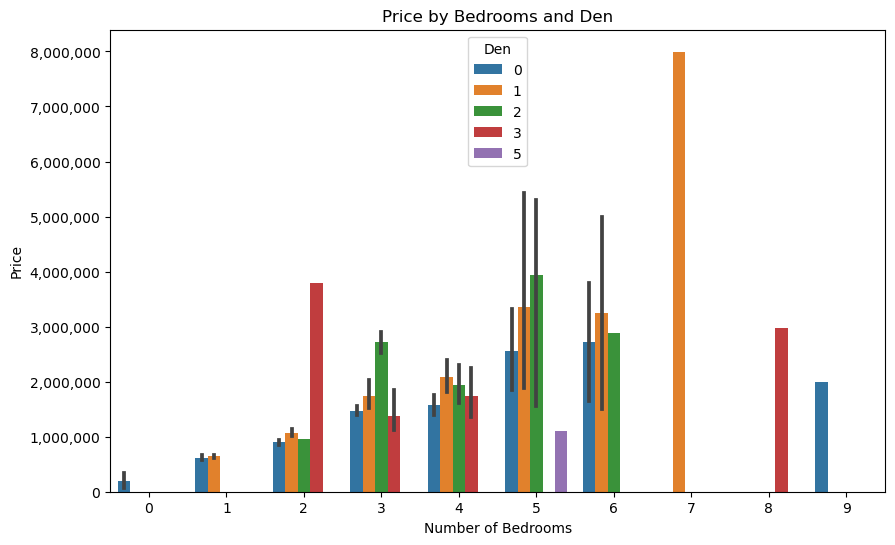

In [15]:
#Bar chart: Price vs. bedrooms and den

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='bedroom', y='price', hue='den', data=houses)

# Customize the chart
plt.title('Price by Bedrooms and Den')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend(title='Den')

# Format y-axis tick labels to display full numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))
# Show the plot
plt.show()


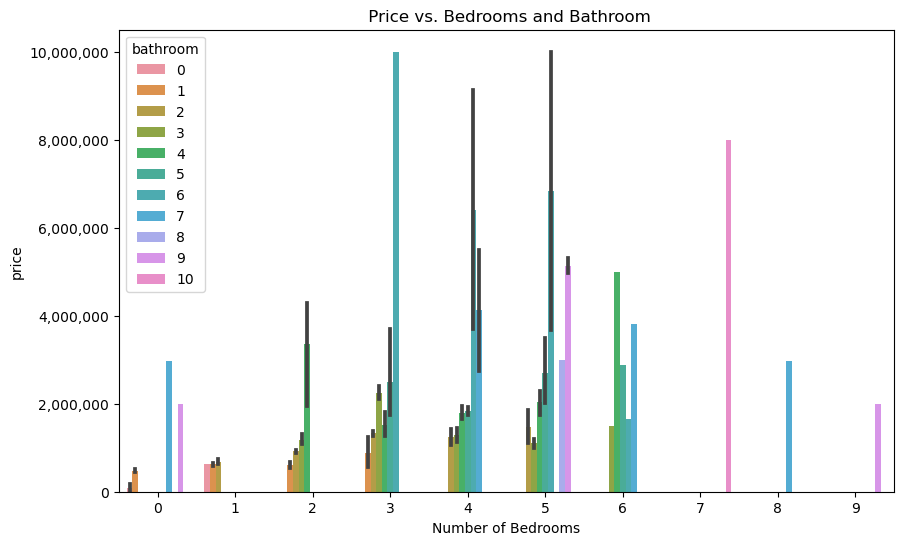

In [16]:
# Create a vertical bar chart: Price vs. bedrooms and bathroom
plt.figure(figsize=(10, 6))
sns.barplot(x='bedroom', y='price', hue='bathroom', data=houses)

# Customize the chart
plt.title(' Price vs. Bedrooms and Bathroom')
plt.xlabel('Number of Bedrooms')
plt.ylabel('price')
plt.legend(title='bathroom')
# Format y-axis tick labels to display full numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))
# Show the plot
plt.show()


In [ ]:
#bar chart: average bedrooms, bathrooms, and dens in the city
# Group by 'city' and calculate the mean of 'bedroom', 'bathroom', and 'den' columns
avg_bedrooms_bathrooms_dens = houses.groupby('city')[['bedroom', 'bathroom', 'den']].mean()

# Plotting the bar chart
avg_bedrooms_bathrooms_dens.plot(kind='bar', figsize=(10, 6))
plt.title('Average Bedrooms, Bathrooms, and Dens by City')
plt.xlabel('City')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend(title='Feature')
plt.tight_layout()
plt.show()